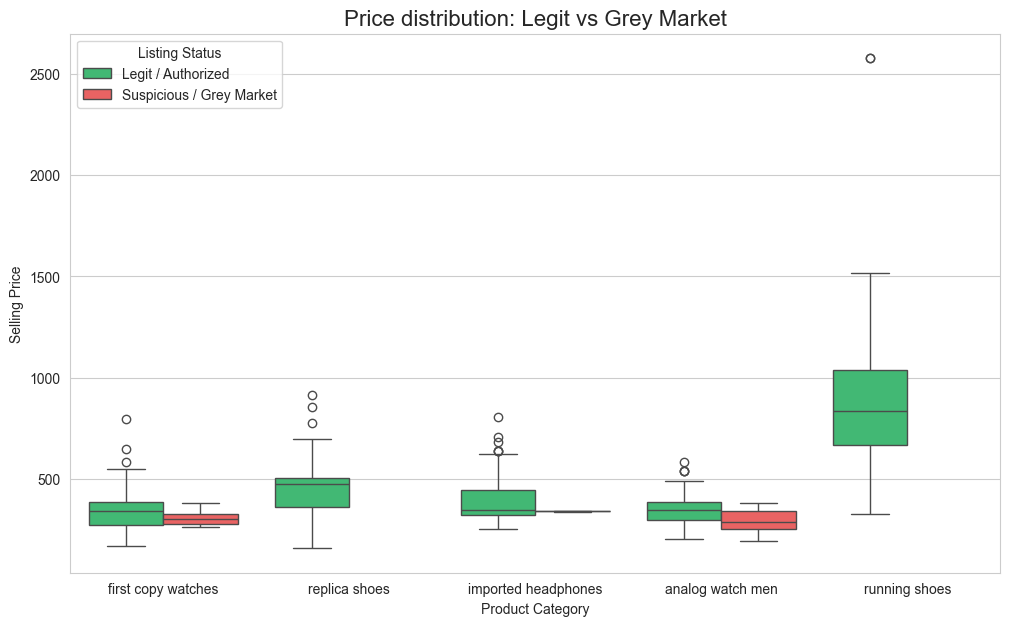

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('snapdeal_mass_dataset.csv')
df.head()

df['Status'] = df['Is_Grey_Market'].map({1: "Suspicious / Grey Market", 0: "Legit / Authorized"})
df['Price_Drop'] = df['MRP'] - df['Selling_Price']


sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)

# 1. Clustering the prices of grey market against the legit prices

plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Search_Term', y='Selling_Price', hue='Status', palette={'Suspicious / Grey Market': '#ff4d4d', 'Legit / Authorized': '#2ecc71'})
plt.title('Price distribution: Legit vs Grey Market', fontsize=16)
plt.xlabel('Product Category')
plt.ylabel('Selling Price')
plt.legend(title="Listing Status")
plt.show()

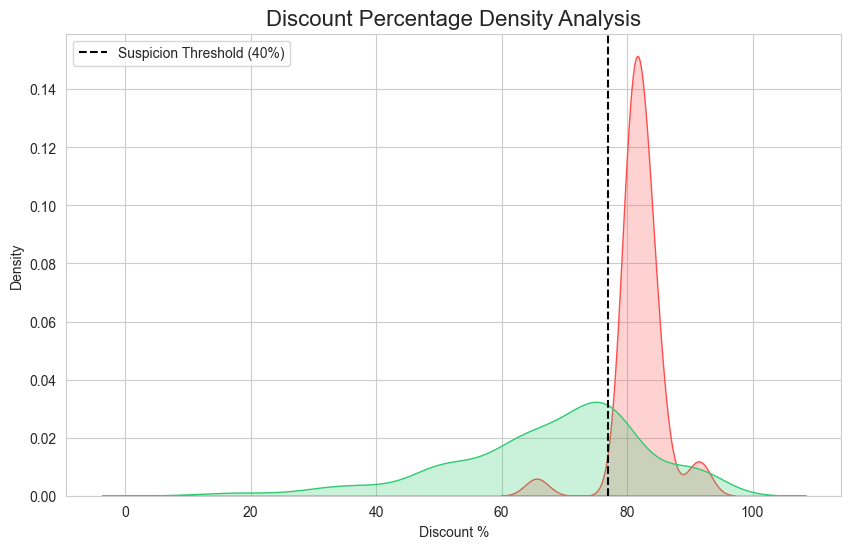

In [5]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Discount_Pct', hue='Status', fill=True, common_norm=False, palette=['#2ecc71', '#ff4d4d'])
plt.title('Discount Percentage Density Analysis', fontsize=16)
plt.xlabel("Discount %")
plt.axvline(x=77, color='black', linestyle='--', label='Suspicion Threshold (40%)')
plt.legend()
plt.show()

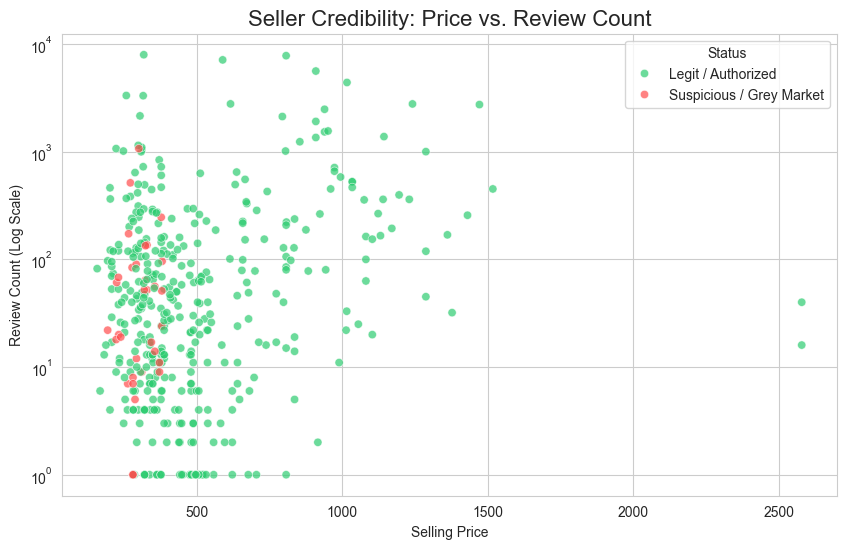

In [6]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Selling_Price', y='Review_Count', hue='Status', alpha=0.7, palette=['#2ecc71', '#ff4d4d'])
plt.yscale('log') # Log scale because legit sellers have massive reviews
plt.title("Seller Credibility: Price vs. Review Count", fontsize=16)
plt.ylabel("Review Count (Log Scale)")
plt.xlabel("Selling Price")
plt.show()

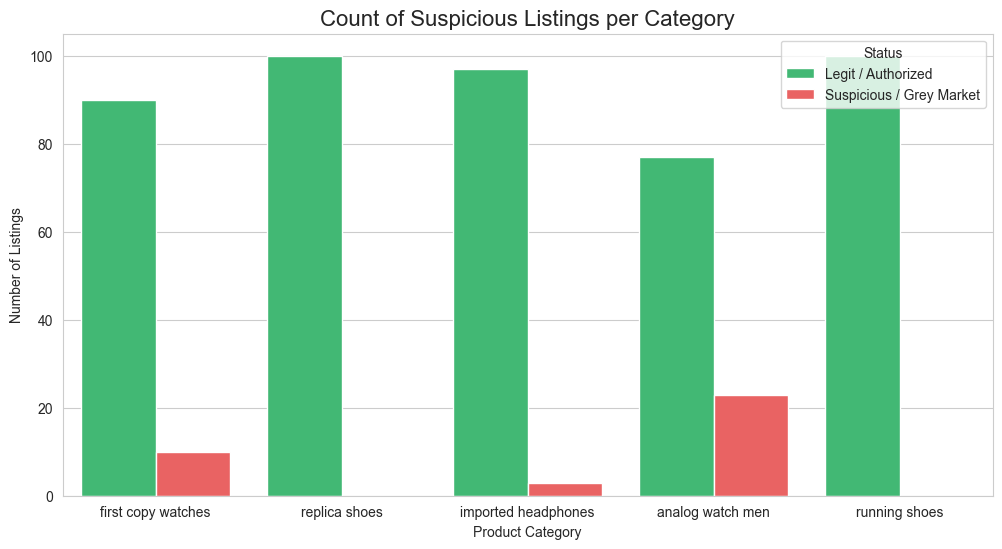

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Search_Term', hue='Status', palette=['#2ecc71', '#ff4d4d'])
plt.title("Count of Suspicious Listings per Category", fontsize=16)
plt.ylabel("Number of Listings")
plt.xlabel("Product Category")
plt.show()

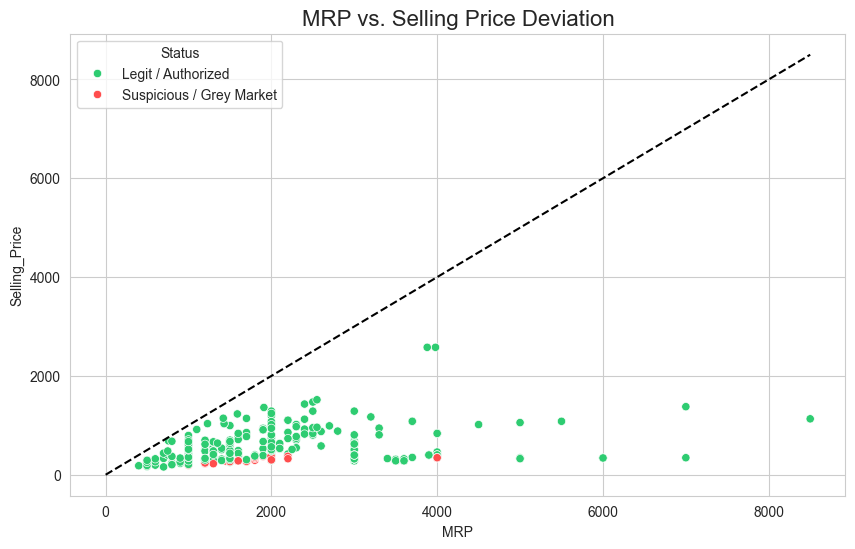

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MRP', y='Selling_Price', hue='Status', palette=['#2ecc71', '#ff4d4d'])
plt.plot([0, df['MRP'].max()], [0, df['MRP'].max()], color='black', linestyle='--', label='Market Standard (MRP)')
plt.title("MRP vs. Selling Price Deviation", fontsize=16)
plt.show()

In [9]:
df.to_csv('Final-snapdeal-dataset.csv', index=False)